In [3]:
pip install pykrx

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 11.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 57.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 KB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 KB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 84.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 93.3 MB/s eta 0:00:00ta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.8/82.8 KB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.0/325.0 KB 70.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 91.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 94.0 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 84.

            Close     MA20          MA60    Return
날짜                                                
2025-07-15  63700  61025.0  57888.333333  1.920000
2025-07-16  64700  61270.0  58055.000000  1.569859
2025-07-17  66700  61645.0  58248.333333  3.091190
2025-07-18  67100  62025.0  58445.000000  0.599700
2025-07-21  67700  62510.0  58650.000000  0.894188


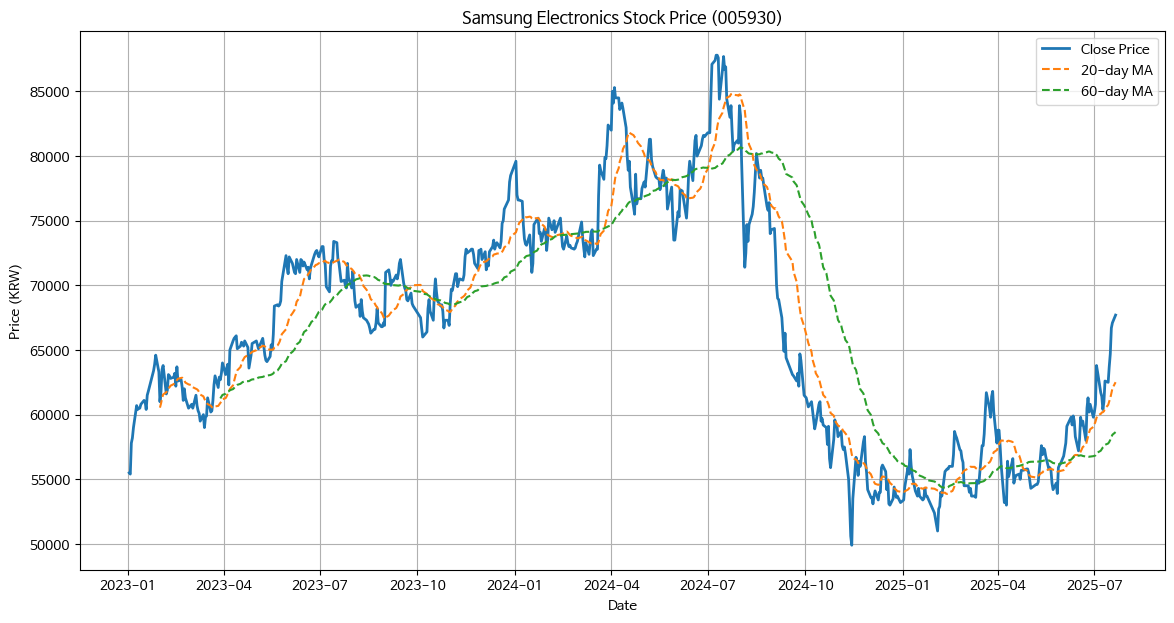

In [4]:
import pandas as pd
from pykrx import stock
import matplotlib.pyplot as plt
import datetime

# 1. 데이터 수집
def get_stock_data(code='005930', start='2023-01-01', end='2025-07-20'):
    df = stock.get_market_ohlcv_by_date(start, end, code)
    df = df[['종가']]  # 종가만 사용
    df.columns = ['Close']
    return df

# 2. 이동평균 및 수익률 계산
def analyze_stock(df):
    df['MA20'] = df['Close'].rolling(window=20).mean()
    df['MA60'] = df['Close'].rolling(window=60).mean()
    df['Return'] = df['Close'].pct_change() * 100  # 일간 수익률 (%)
    return df

# 3. 시각화
def plot_stock(df):
    plt.figure(figsize=(14, 7))
    plt.plot(df.index, df['Close'], label='Close Price', linewidth=2)
    plt.plot(df.index, df['MA20'], label='20-day MA', linestyle='--')
    plt.plot(df.index, df['MA60'], label='60-day MA', linestyle='--')
    plt.title('Samsung Electronics Stock Price (005930)')
    plt.xlabel('Date')
    plt.ylabel('Price (KRW)')
    plt.legend()
    plt.grid(True)
    plt.show()

# 4. 실행
if __name__ == "__main__":
    start_date = '2023-01-01'
    end_date = datetime.datetime.today().strftime('%Y-%m-%d')

    df = get_stock_data('005930', start=start_date, end=end_date)
    df = analyze_stock(df)
    print(df.tail())

    plot_stock(df)